Enter number of nodes in you network: 6

The graph is ergodic


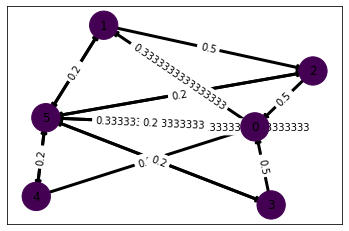


Select a node in this network: 4


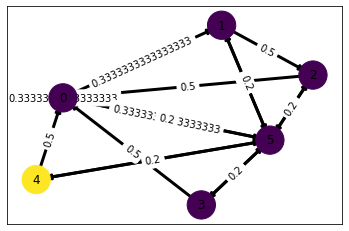

ITERATION: 1
MAX: 0.2 MIN: 0.0
ITERATION: 2
MAX: 0.1 MIN: 0.0
ITERATION: 3
MAX: 0.09333333333333335 MIN: 0.03333333333333333
ITERATION: 4
MAX: 0.07444444444444445 MIN: 0.04111111111111112
ITERATION: 5
MAX: 0.0705925925925926 MIN: 0.05370370370370371
ITERATION: 6
MAX: 0.06375308641975308 MIN: 0.05516049382716051
ITERATION: 7
MAX: 0.06303374485596708 MIN: 0.05846090534979425
ITERATION: 8
MAX: 0.06136186556927298 MIN: 0.0589058984910837
ITERATION: 9
MAX: 0.06111195244627344 MIN: 0.059816369455875644
ITERATION: 10
MAX: 0.06061932022557538 MIN: 0.059941935680536525
ITERATION: 11
MAX: 0.06055592582431541 MIN: 0.060199721587156446
ITERATION: 12
MAX: 0.06042189693305561 MIN: 0.060233532151264216
ITERATION: 13
MAX: 0.060403664355591705 MIN: 0.06030416971215997

Final value of nodes :  0.060403664355591705

Do you want to try another node in this network? press n if your answer is no : n


In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
import random

cont_inue=True
#construct_a_barabasi_albert_graph_graph
Orginal_G=Graph_Construction()
while cont_inue:
    #Select_a_node_in_constructed_graph_that_has_1_value
    Orginal_G,num_of_selected_node=Select_a_node(Orginal_G)
    #run_opinion_dynamic
    consensus_result = Consus_Dynamics(Orginal_G,num_of_selected_node)
    print("\nFinal value of nodes : ",consensus_result)
    y_or_n=input("\nDo you want to try another node in this network? press n if your answer is no : ")
    if y_or_n=="n":
        cont_inue=False

### "Consus_Dynamics" function is responsible for updating the nodes states:

In [21]:
 def Consus_Dynamics(Orginal_G,random_num):
    new_state=dict()
    state=dict()
    cntn=True
    iteration=0
    new_state.clear()
    state.clear()  
     
        
        
    for node in Orginal_G:
        state[node]=0
        new_state[node] = 0
    state[num_of_selected_node]=1

    
    while cntn:
        for (b,a) in Orginal_G.edges(): 
                new_state[b] = (state[a]*Orginal_G[b][a]['weight'])+ new_state[b] 
                #print("a,b,state a, weight,sm",a,b,state[b],Orginal_G[b][a]['weight'],sm)
                #print(new_state)    
        state =  new_state.copy()
        for node in Orginal_G:
            new_state[node] = 0
        ma=max(state.values())
        mi=min(state.values())
        iteration=iteration+1
        print("ITERATION:",iteration)
        print("MAX:",ma,"MIN:",mi)
        if ma <=  mi+0.0001 :
               cntn=False           
    return max(state.values())

### "Graph_Construction" function is responsible for making a ergodic graph:

In [33]:
def Graph_Construction():
    num_of_nodes=int(input("Enter number of nodes in you network: "))
    G=nx.scale_free_graph(num_of_nodes-1)
    Orginal_G=nx.DiGraph(G)
    Orginal_G.add_node(num_of_nodes-1)
    for node in Orginal_G:
        Orginal_G.add_edge(node,num_of_nodes-1)
        Orginal_G.add_edge(num_of_nodes-1,node)
    Orginal_G.remove_edge(num_of_nodes-1,num_of_nodes-1) 
    out_edges=1
    for node in Orginal_G:
            out_edges=len(Orginal_G.out_edges(node))
            for v in Orginal_G.neighbors(node):
                Orginal_G[node][v]['weight'] = 1/out_edges
    
    node_color=dict()
    node_color = dict.fromkeys((range(num_of_nodes)))
    node_color = node_color.fromkeys(node_color, 0.9)
    Is_ergodic(Orginal_G)
    Show_network(Orginal_G,node_color)
    return Orginal_G

### "Show_network" function is responsible for showing the graph:

In [7]:
def Show_network(Orginal_G,node_color):
    pos = nx.spring_layout(Orginal_G)
    labels = nx.get_edge_attributes(Orginal_G,'weight')
    nx.draw_networkx_nodes(Orginal_G, pos,node_color=list(node_color.values()),node_size=800)
    nx.draw_networkx_labels(Orginal_G, pos)    
    nx.draw_networkx_edge_labels(Orginal_G,pos,edge_labels=labels, arrows=True)
    nx.draw_networkx_edges(Orginal_G, pos,edge_color='black', arrows=True,arrowstyle = '-|>', width=3, arrowsize=10)
    plt.show()

### "Select_a_node" function is responsible for assaigning the color of nodes in the graph:

In [8]:
def Select_a_node(Orginal_G):
    node_color=dict()
    num_of_selected_node=int(input("\nSelect a node in this network: "))
    for node in Orginal_G:
        node_color[node]=0.2
    node_color[num_of_selected_node]=0.8
    Show_network(Orginal_G,node_color)
    return Orginal_G,num_of_selected_node

### "Is_ergodic" function check that a graph is ergodic or not :

In [40]:
def Is_ergodic(Orginal_G):
        if (nx.is_aperiodic(Orginal_G) and nx.is_strongly_connected(Orginal_G)):
             print("\nThe graph is ergodic")
        else:
            cont_inue=False
            print("\nThe graph is not ergodic")

### Convergence of beliefs example at https://en.wikipedia.org/wiki/DeGroot_learning#Consensus


The graph is ergodic

Select a node in this network: 2


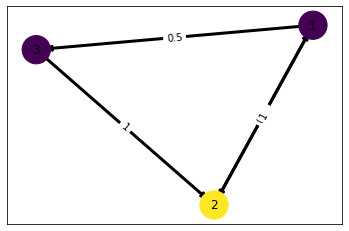

ITERATION: 1
MAX: 1 MIN: 0
ITERATION: 2
MAX: 0.5 MIN: 0
ITERATION: 3
MAX: 0.5 MIN: 0.25
ITERATION: 4
MAX: 0.5 MIN: 0.25
ITERATION: 5
MAX: 0.5 MIN: 0.25
ITERATION: 6
MAX: 0.5 MIN: 0.375
ITERATION: 7
MAX: 0.4375 MIN: 0.375
ITERATION: 8
MAX: 0.4375 MIN: 0.375
ITERATION: 9
MAX: 0.4375 MIN: 0.375
ITERATION: 10
MAX: 0.40625 MIN: 0.375
ITERATION: 11
MAX: 0.40625 MIN: 0.390625
ITERATION: 12
MAX: 0.40625 MIN: 0.390625
ITERATION: 13
MAX: 0.40625 MIN: 0.390625
ITERATION: 14
MAX: 0.40625 MIN: 0.3984375
ITERATION: 15
MAX: 0.40234375 MIN: 0.3984375
ITERATION: 16
MAX: 0.40234375 MIN: 0.3984375
ITERATION: 17
MAX: 0.40234375 MIN: 0.3984375
ITERATION: 18
MAX: 0.400390625 MIN: 0.3984375
ITERATION: 19
MAX: 0.400390625 MIN: 0.3994140625
ITERATION: 20
MAX: 0.400390625 MIN: 0.3994140625
ITERATION: 21
MAX: 0.400390625 MIN: 0.3994140625
ITERATION: 22
MAX: 0.400390625 MIN: 0.39990234375
ITERATION: 23
MAX: 0.400146484375 MIN: 0.39990234375
ITERATION: 24
MAX: 0.400146484375 MIN: 0.39990234375
ITERATION: 25
MAX: 0

In [44]:
example_graph=nx.DiGraph()
example_graph.add_node(1)
example_graph.add_node(2)
example_graph.add_node(3)
example_graph.add_edge(1,2)
example_graph[1][2]['weight'] = 0.5
example_graph.add_edge(2,1)
example_graph[2][1]['weight'] = 1
example_graph.add_edge(1,3)
example_graph[1][3]['weight'] = 0.5
example_graph.add_edge(3,2)
example_graph[3][2]['weight'] = 1
Is_ergodic(example_graph)
our_example_graph,num_of_selected_node=Select_a_node(example_graph)
consensus_result = Consus_Dynamics(our_example_graph,num_of_selected_node)
print("\nFinal value of nodes : ",consensus_result)